<a href="https://colab.research.google.com/github/deekshak77/predictionmodel/blob/main/ML_Braindisease_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Import necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('TCGA_InfoWithGrade.csv')
print(df)


     Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0         0             51.30     0     1     0     0     0     0    0      0   
1         0             38.72     0     1     0     0     0     0    1      0   
2         0             35.17     0     1     1     1     0     0    0      0   
3         1             32.78     0     1     1     1     0     0    0      1   
4         0             31.51     0     1     1     1     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
834       1             77.89     0     0     0     0     1     0    0      0   
835       0             85.18     0     0     1     0     1     0    0      0   
836       1             77.49     0     0     1     0     1     0    0      0   
837       0             63.33     0     0     1     0     0     0    0      1   
838       0             76.61     1     0     0     0     0     0    0      0   

     ...  RB1  NOTCH1  BCOR

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            839 non-null    int64  
 1   Age_at_diagnosis  839 non-null    float64
 2   Race              839 non-null    int64  
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

In [ ]:
df.describe()
#statistical measure about the data

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,...,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222,0.419547
std,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,...,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889,0.493779
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age_at_diagnosis'}>,
        <Axes: title={'center': 'Race'}>,
        <Axes: title={'center': 'IDH1'}>,
        <Axes: title={'center': 'TP53'}>],
       [<Axes: title={'center': 'ATRX'}>,
        <Axes: title={'center': 'PTEN'}>,
        <Axes: title={'center': 'EGFR'}>,
        <Axes: title={'center': 'CIC'}>,
        <Axes: title={'center': 'MUC16'}>],
       [<Axes: title={'center': 'PIK3CA'}>,
        <Axes: title={'center': 'NF1'}>,
        <Axes: title={'center': 'PIK3R1'}>,
        <Axes: title={'center': 'FUBP1'}>,
        <Axes: title={'center': 'RB1'}>],
       [<Axes: title={'center': 'NOTCH1'}>,
        <Axes: title={'center': 'BCOR'}>,
        <Axes: title={'center': 'CSMD3'}>,
        <Axes: title={'center': 'SMARCA4'}>,
        <Axes: title={'center': 'GRIN2A'}>],
       [<Axes: title={'center': 'IDH2'}>,
        <Axes: title={'center': 'FAT4'}>,
        <Axes: title={'center': 'PDGFRA'}>,
   

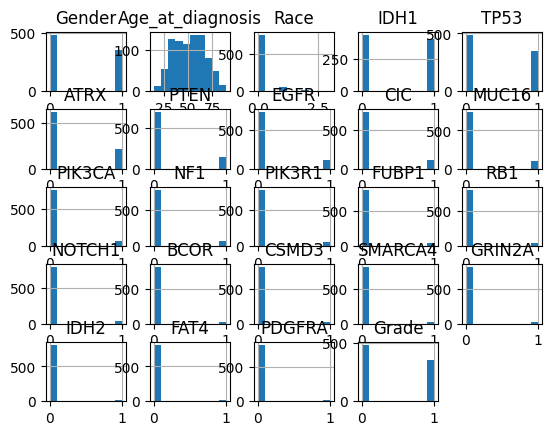

In [ ]:
df.hist()

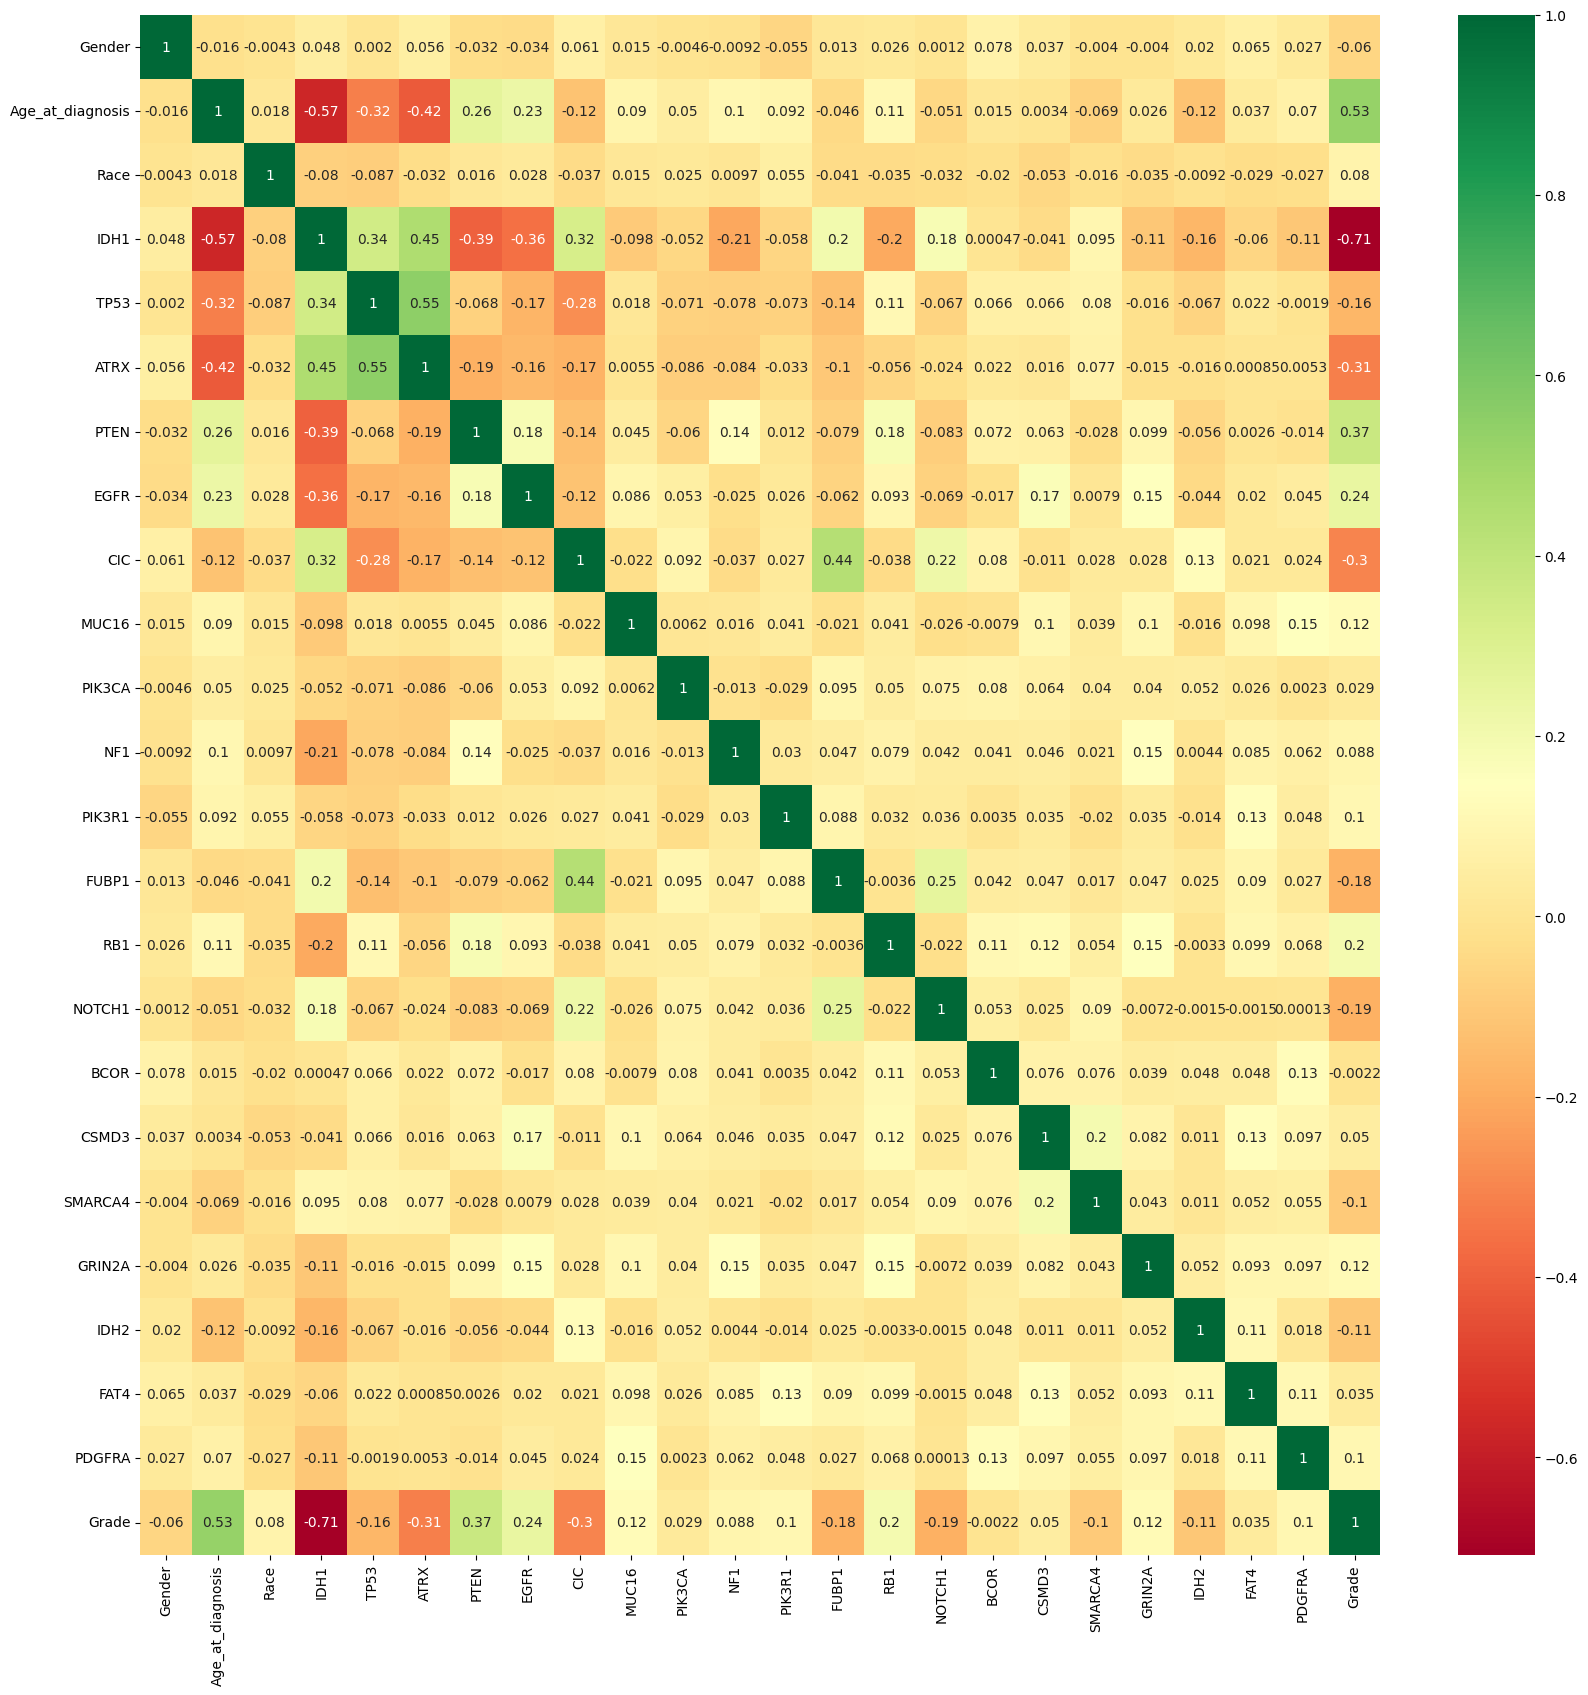

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
import seaborn as sns

<Axes: xlabel='Grade', ylabel='count'>

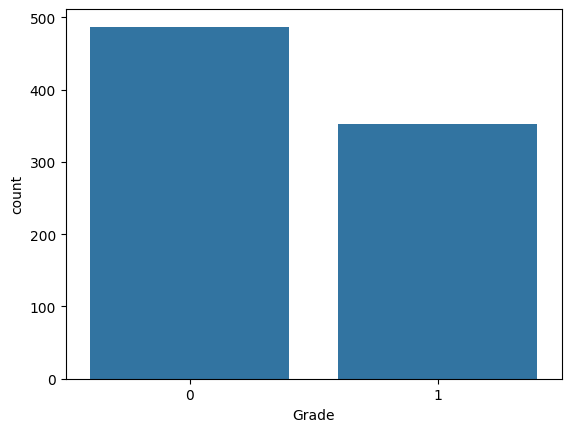

In [ ]:
sns.countplot(x='Grade',data=df)

<Axes: xlabel='Grade', ylabel='count'>

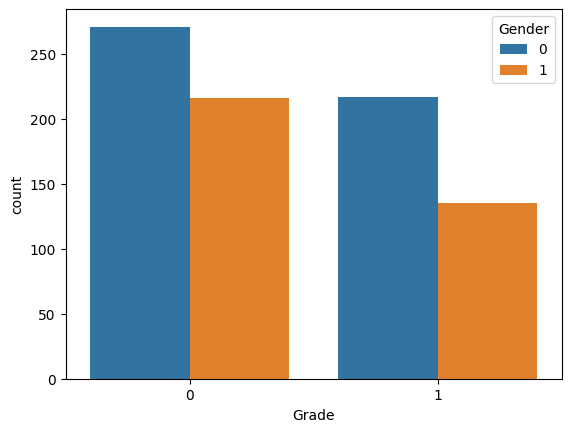

In [ ]:
sns.countplot(x='Grade',data=df,hue='Gender')

<Axes: ylabel='Frequency'>

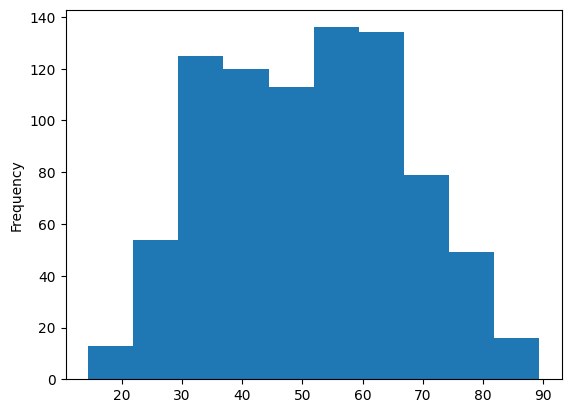

In [ ]:
df['Age_at_diagnosis'].plot.hist()

Feature Selection


<Axes: xlabel='PTEN', ylabel='count'>

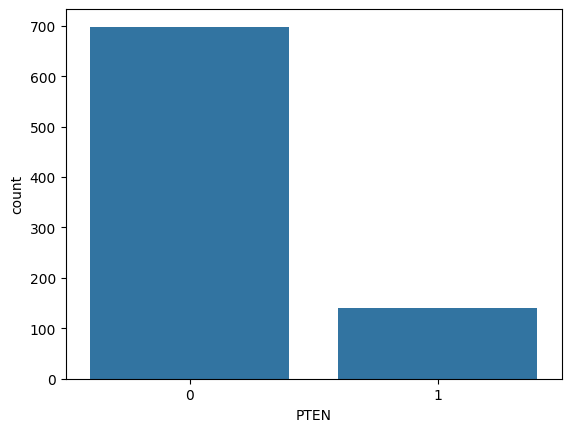

In [ ]:

sns.countplot(x='PTEN',data=df)

<Axes: ylabel='Frequency'>

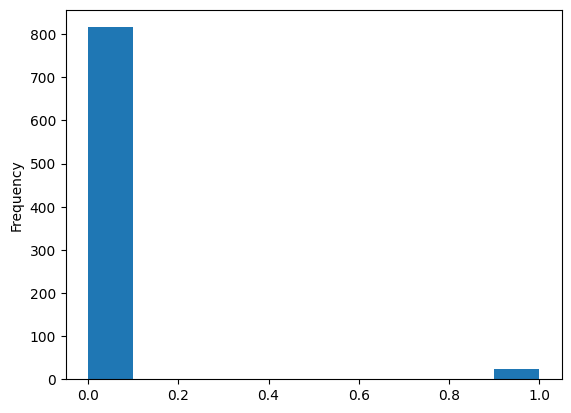

In [ ]:
df['FAT4'].plot.hist()


<ipython-input-20-15ebe08628e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RB1',data=df, palette='rocket')


<Axes: xlabel='RB1', ylabel='count'>

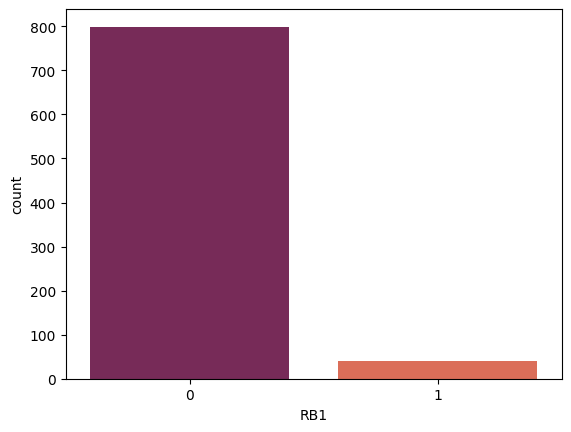

In [ ]:
sns.countplot(x='RB1',data=df, palette='rocket')

In [ ]:
df.head()

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,0,51.30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail()
#prints last 5 rows

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
834,1,77.89,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835,0,85.18,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
836,1,77.49,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
837,0,63.33,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
838,0,76.61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#number of rows and coloumns in th datasets
df.shape

(839, 24)

<ipython-input-23-15ebe08628e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RB1',data=df, palette='rocket')


<Axes: xlabel='RB1', ylabel='count'>

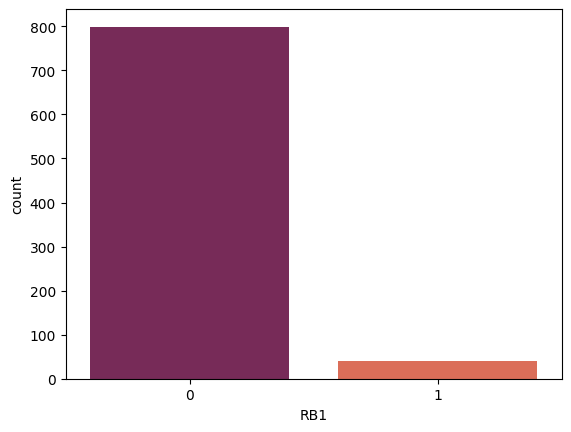

In [ ]:
sns.countplot(x='RB1',data=df, palette='rocket')

In [ ]:
#checking for missing values
df.isnull().sum()

Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
Grade               0
dtype: int64

In [ ]:
#checking the distribution of the target variable
df['Grade'].value_counts()


0    487
1    352
Name: Grade, dtype: int64

In [ ]:
x = df.drop(columns='Grade',axis=1)
y = df['Grade']

In [ ]:
print(x)

     Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0         0             51.30     0     1     0     0     0     0    0      0   
1         0             38.72     0     1     0     0     0     0    1      0   
2         0             35.17     0     1     1     1     0     0    0      0   
3         1             32.78     0     1     1     1     0     0    0      1   
4         0             31.51     0     1     1     1     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
834       1             77.89     0     0     0     0     1     0    0      0   
835       0             85.18     0     0     1     0     1     0    0      0   
836       1             77.49     0     0     1     0     1     0    0      0   
837       0             63.33     0     0     1     0     0     0    0      1   
838       0             76.61     1     0     0     0     0     0    0      0   

     ...  FUBP1  RB1  NOTCH

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
834    1
835    1
836    1
837    1
838    1
Name: Grade, Length: 839, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(839, 23) (671, 23) (168, 23)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#Training the logistic Regression model with Training data
model.fit(x_train,y_train)

NameError: name 'model' is not defined

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)


In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8748137108792846


In [ ]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8809523809523809


Bulding a Predictive System

In [ ]:
input_data = (1,40.53,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Brain Disease')
else:
  print('The Person has Brain Disease')

[0]
The Person does not have a Brain Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Building a predictive system(Random Forest)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

rf_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        98
           1       0.82      0.80      0.81        70

    accuracy                           0.85       168
   macro avg       0.84      0.84      0.84       168
weighted avg       0.84      0.85      0.84       168



In [ ]:
input_data=(1,53.71,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#Reshape the numpy array as we are predicting for only one instance
input_array_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=rf_classifier.predict(input_array_reshaped)

print(prediction)

if(prediction[0] ==0):
  print('Person does not have Brain disease')
else:
  print('Person has Brain disease')


[0]
Person does not have Brain disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Decision tree

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with features (X) and labels (y)
# X and y should be NumPy arrays or pandas DataFrames



# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        98
           1       0.81      0.79      0.80        70

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



In [ ]:
input_data=(1,53.71,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#Reshape the numpy array as we are predicting for only one instance
input_array_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=dt_classifier.predict(input_array_reshaped)
print(prediction)

if(prediction[0] ==0):
  print('Person does not have Brain disease')
else:
  print('Person has Brain disease')

[0]
Person does not have Brain disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


confusion matrix

Confusion Matrix:
[[86 12]
 [14 56]]

Accuracy: 0.8452380952380952
Precision: 0.8235294117647058
Recall: 0.8
F1 Score: 0.8115942028985507


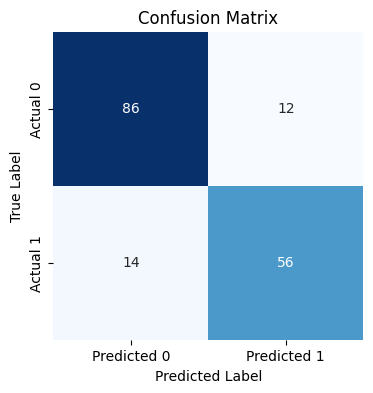

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true is the true labels and y_pred is the predicted labels
# Replace y_true and y_pred with your actual data

# Example data (replace with your actual data)
#y_true = [0,0,0,0,1,0,0,0]

#y_pred = [0,0,0,0,1,0,0,0]
y_pred=rf_classifier.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC And AUC curves

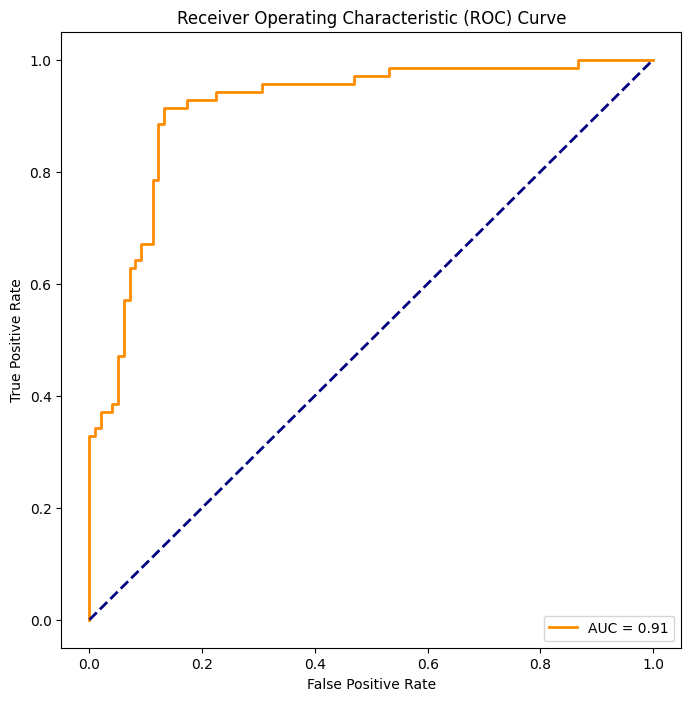

In [ ]:
# Assuming you have your features in X and labels in y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (in this example, Logistic Regression)
#model = LogisticRegression()
#model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probabilities = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XG Booster

Accuracy: 0.8273809523809523
ROC AUC Score: 0.9290087463556851


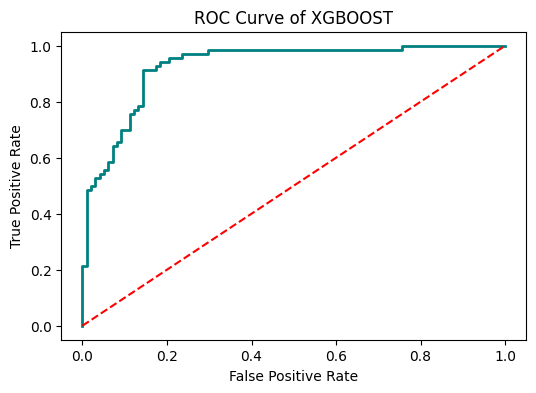

In [ ]:
#importing the XGBoost Classifier module
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(x_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(x_test)
y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

KNN classification

In [ ]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(x_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

NameError: ignored